In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Probability of flow

In [1]:
res_path = 'percolation_res/p_flow/'
filename = lambda lattice, L, mcs : res_path + 'p_flow_' + lattice + '_L' + str(L) + '_mcs' + str(mcs) + '.dat'

### Square

Text(0.5, 1.0, 'Probability of flow on square lattice for different lattice sizes')

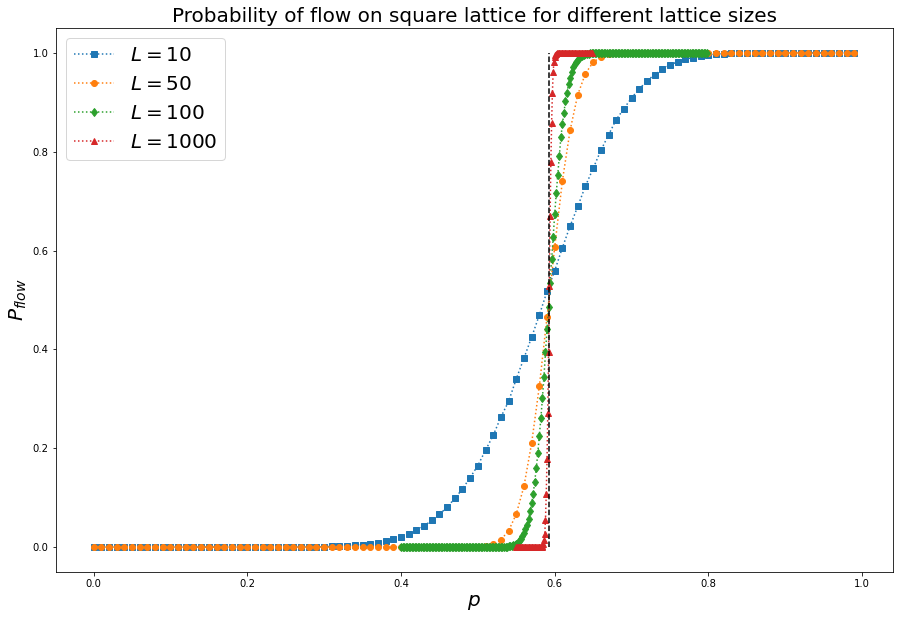

In [3]:
LL = ["10","50","100","1000"]

markers = ["s","o","d","^"]
fig = plt.figure(figsize=(15,10))

for L in LL:
    mcs = 0
    if L == "1000":
        mcs = 10000
    else:
        mcs = 100000
    data = np.loadtxt(filename('square', L, mcs))
    p = data[:,0]
    p_flow = data[:,1]
    plt.plot(p, p_flow, label='$L = $' + L, linestyle=':', marker=markers.pop(0))
plt.vlines(0.59274621, ymin=0,ymax=1, color='k', linestyle='--')

plt.legend(fontsize=20)
plt.xlabel('$p$', fontsize=20)
plt.ylabel("$P_{flow}$", fontsize=20)
plt.title("Probability of flow on square lattice for different lattice sizes", fontsize=20)

### Triangular

Text(0.5, 1.0, 'Probability of flow on triangular lattice for different lattice sizes')

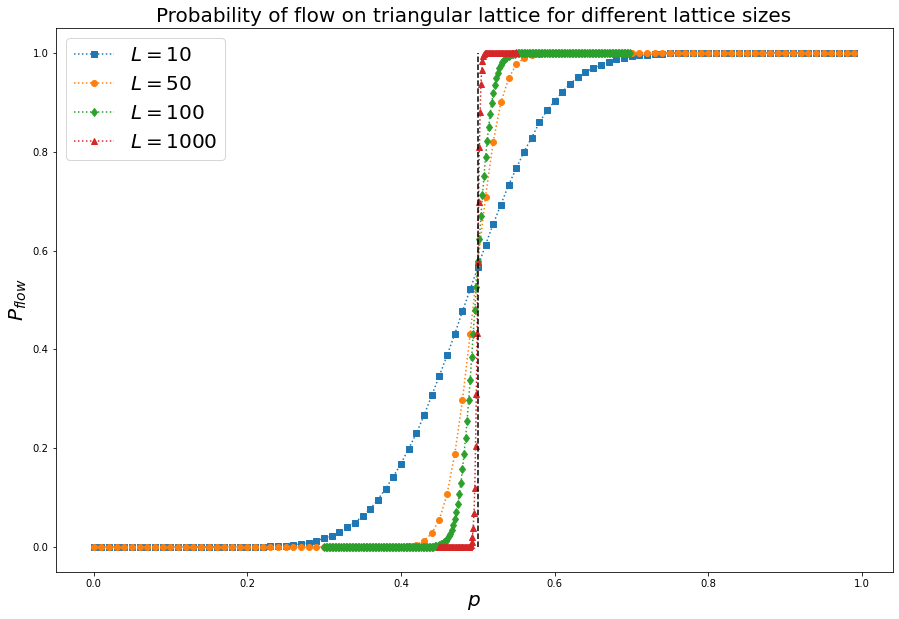

In [4]:
LL = ["10","50","100","1000"]
markers = ["s","o","d","^"]
fig = plt.figure(figsize=(15,10))

for L in LL:
    mcs = 0
    if L == "1000":
        mcs = 10000
    else:
        mcs = 100000
    data = np.loadtxt(filename('triangle', L, mcs))
    p = data[:,0]
    p_flow = data[:,1]
    plt.plot(p, p_flow, label='$L = $' + L, linestyle=':', marker=markers.pop(0))
plt.vlines(0.5, ymin=0,ymax=1, color='k', linestyle='--')
plt.legend(fontsize=20)
plt.xlabel('$p$', fontsize=20)
plt.ylabel("$P_{flow}$", fontsize=20)
plt.title("Probability of flow on triangular lattice for different lattice sizes", fontsize=20)

# Maximal cluster size

In [5]:
res_path = 'percolation_res/max_cluster/'
filename_square = lambda lattice, L, mcs : res_path + 'max_cluster_size_' + lattice + '_L' + str(L) + '_mcs' + str(mcs) + '.dat'
filename_triangle3 = lambda lattice, L, mcs : res_path + '3_max_cluster_size_' + lattice + '_L' + str(L) + '_mcs' + str(mcs) + '.dat'
filename_triangle2 = lambda lattice, L, mcs : res_path + '2_max_cluster_size_' + lattice + '_L' + str(L) + '_mcs' + str(mcs) + '.dat'

### Square

Text(0.5, 1.0, 'Max cluster size on square lattice for different lattice sizes')

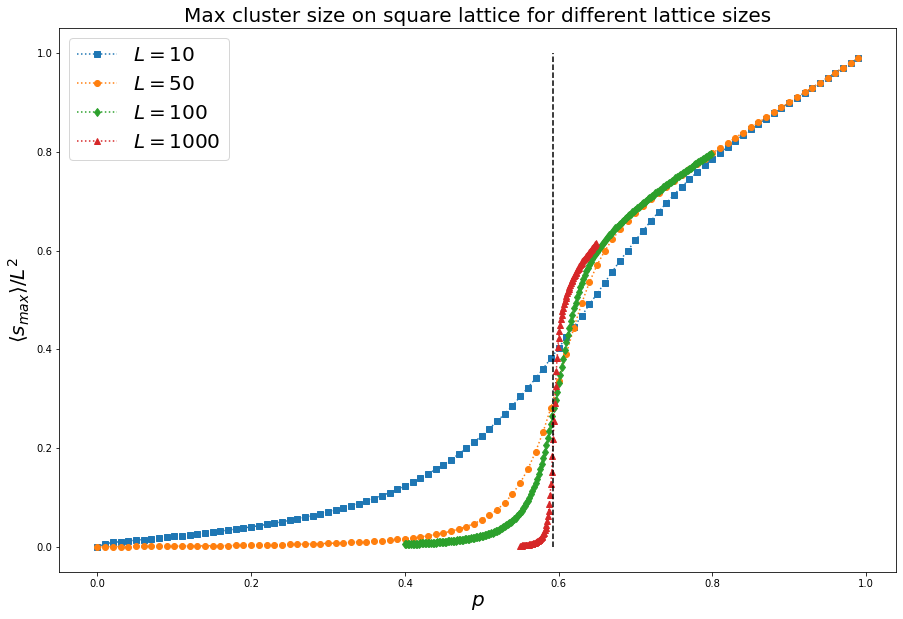

In [6]:
LL = ["10","50","100", "1000"]

markers = ["s","o","d","^"]
fig = plt.figure(figsize=(15,10))

for L in LL:
    mcs = 0
    if L == "1000":
        mcs = 10000
    else:
        mcs = 100000
    data = np.loadtxt(filename_square('square', L, mcs))
    p = data[:,0]
    max_cluster = data[:,1]/int(L)**2
    plt.plot(p, max_cluster, label='$L = $' + L, linestyle=':', marker=markers.pop(0))
plt.vlines(0.59274621, ymin=0,ymax=1, color='k', linestyle='--')

plt.legend(fontsize=20)
plt.xlabel('$p$', fontsize=20)
plt.ylabel(r"$\langle s_{max} \rangle/L^2$", fontsize=20)
plt.title("Max cluster size on square lattice for different lattice sizes", fontsize=20)

### Triangle

Text(0.5, 1.0, 'Max cluster size on triangular lattice for different lattice sizes')

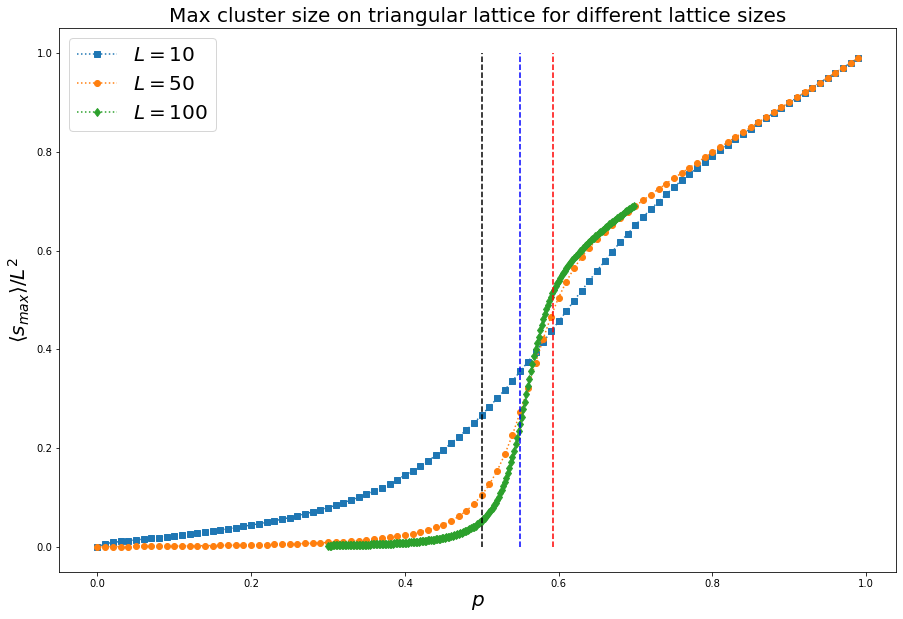

In [8]:
# LL = ["10","50","100","1000"]
LL = ["10","50","100"]

markers = ["s","o","d","^"]
fig = plt.figure(figsize=(15,10))

for L in LL:
    mcs = 0
    if L == "1000":
        mcs = 10000
    else:
        mcs = 100000
    data = []
    if L == "10":
        data = np.loadtxt(filename_triangle3('triangle', L, mcs))
    else:
        data = np.loadtxt(filename_triangle3('triangle', L, mcs))
    p = data[:,0]
    max_cluster = data[:,1]/int(L)**2
    plt.plot(p, max_cluster, label='$L = $' + L, linestyle=':', marker=markers.pop(0))
plt.vlines(0.5, ymin=0,ymax=1, color='k', linestyle='--')
plt.vlines(0.59274621, ymin=0,ymax=1, color='r', linestyle='--')
plt.vlines(0.55, ymin=0,ymax=1, color='b', linestyle='--')
plt.legend(fontsize=20)
plt.xlabel('$p$', fontsize=20)
plt.ylabel(r"$\langle s_{max} \rangle/L^2$", fontsize=20)
plt.title("Max cluster size on triangular lattice for different lattice sizes", fontsize=20)

# Cluster size distribution

In [9]:
res_path = 'percolation_res/cluster_dist/'
filename_square = lambda lattice, L, mcs, p : res_path + 'cluster_sizes_distribution_' + lattice + '_L' + str(L) + '_mcs' + str(mcs) +'_p' + r'{0:.6f}'.format(p)+ '.dat'
filename_triangle = lambda lattice, L, mcs, p : res_path + '3_cluster_sizes_distribution_' + lattice + '_L' + str(L) + '_mcs' + str(mcs) +'_p' + r'{0:.6f}'.format(p)+ '.dat'

### Square

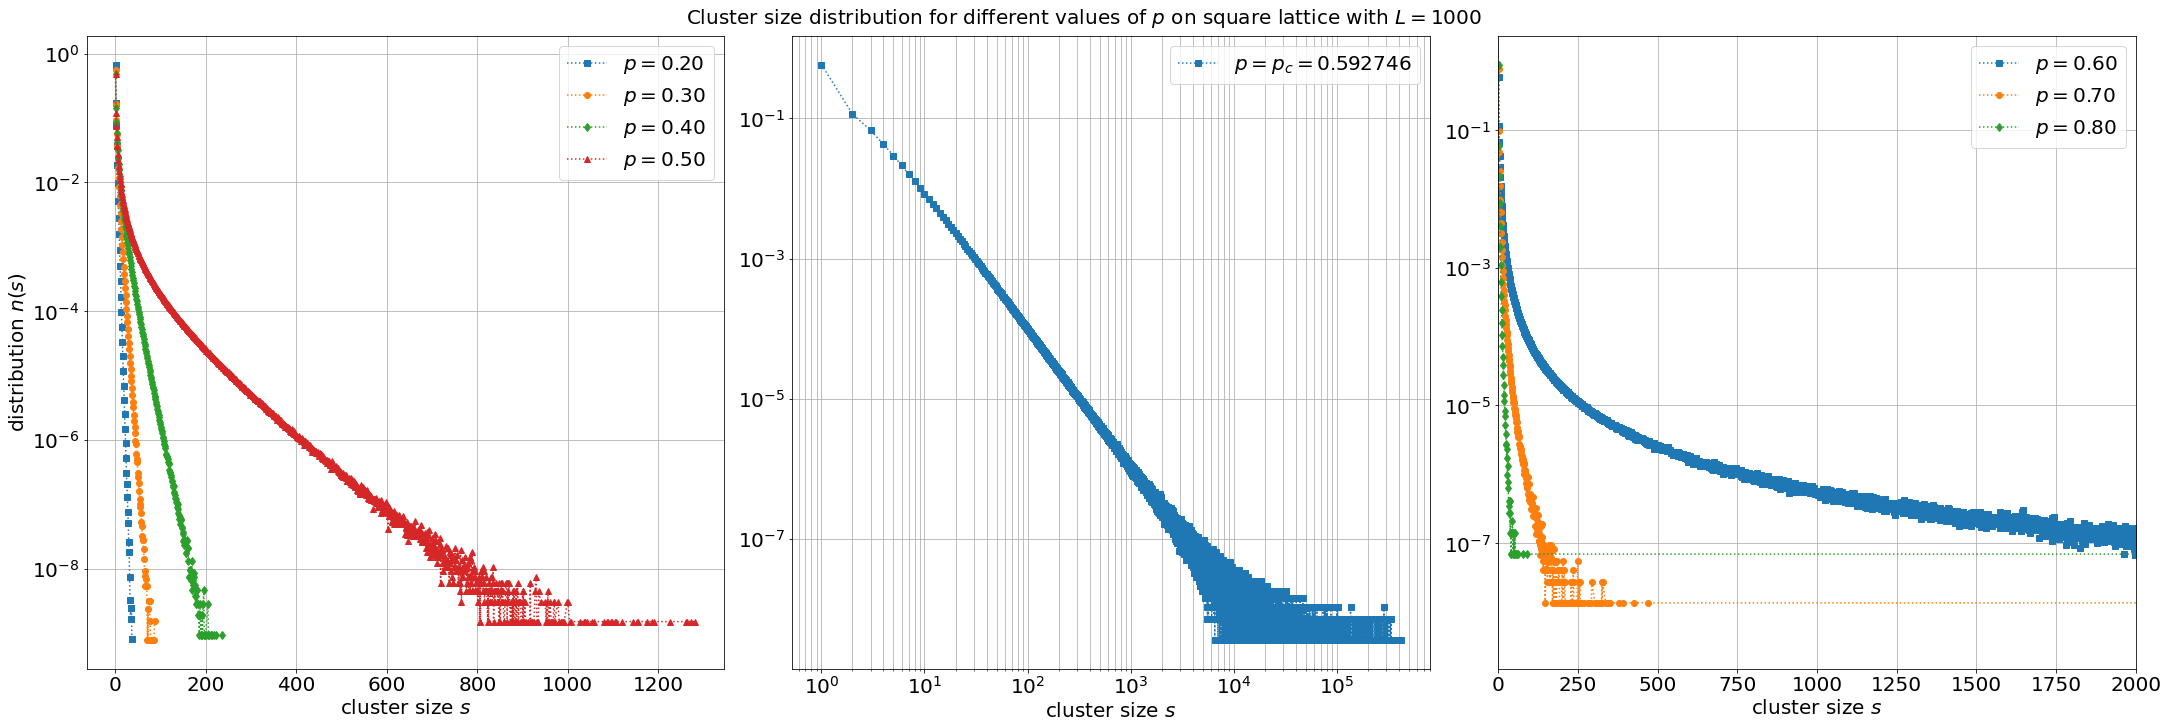

In [32]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(30,10),constrained_layout=True)
gs = GridSpec(1, 3, figure=fig)

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])

p1 = [0.2,0.3,0.4,0.5]
p2 = [0.592746]
p3 = [0.6,0.7,0.8]
L = "1000"

ax1.set_ylabel(r"distribution $n(s)$", fontsize=20)
markers = ["s","o","d","^"]
for p in p1:
    data = np.loadtxt(filename_square('square',L, "10000", p), delimiter=' ')
    s = data[:,0]
    n = data[:,1]
    ax1.semilogy(s, n/np.sum(n), label='$p = $' + r'{0:.2f}'.format(p), linestyle=':', marker=markers.pop(0))


markers = ["s","o","d","^"]
for p in p2:
    data = np.loadtxt(filename_square('square',L, "10000", p), delimiter=' ')
    s = data[:,0]
    n = data[:,1]
    ax2.loglog(s, n/np.sum(n), label='$p = p_c = $' + r'{0:.6f}'.format(p),linestyle=':', marker=markers.pop(0))
# ax2.set_xlim([1,10000])

markers = ["s","o","d","^"]
for p in p3:
    data = np.loadtxt(filename_square('square',L, "10000", p), delimiter=' ')
    s = data[:,0]
    n = data[:,1]
    ax3.semilogy(s, n/np.sum(n), label='$p = $' + r'{0:.2f}'.format(p),linestyle=':', marker=markers.pop(0))
    # ax3.loglog(s, n/np.sum(n), label='$p = $' + r'{0:.2f}'.format(p),linestyle=':', marker=markers.pop(0))
ax3.set_xlim([0,2000])

for ax in [ax1,ax2,ax3]:
    ax.set_xlabel(r"cluster size $s$", fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.grid(visible=True, which='both')
    ax.legend(fontsize=20)
    # ax.set_ylim([1e-7,1])


# set joint title
fig.suptitle("Cluster size distribution for different values of $p$ on square lattice with $L = "+L+"$", fontsize=20)
plt.show()

### Triangular

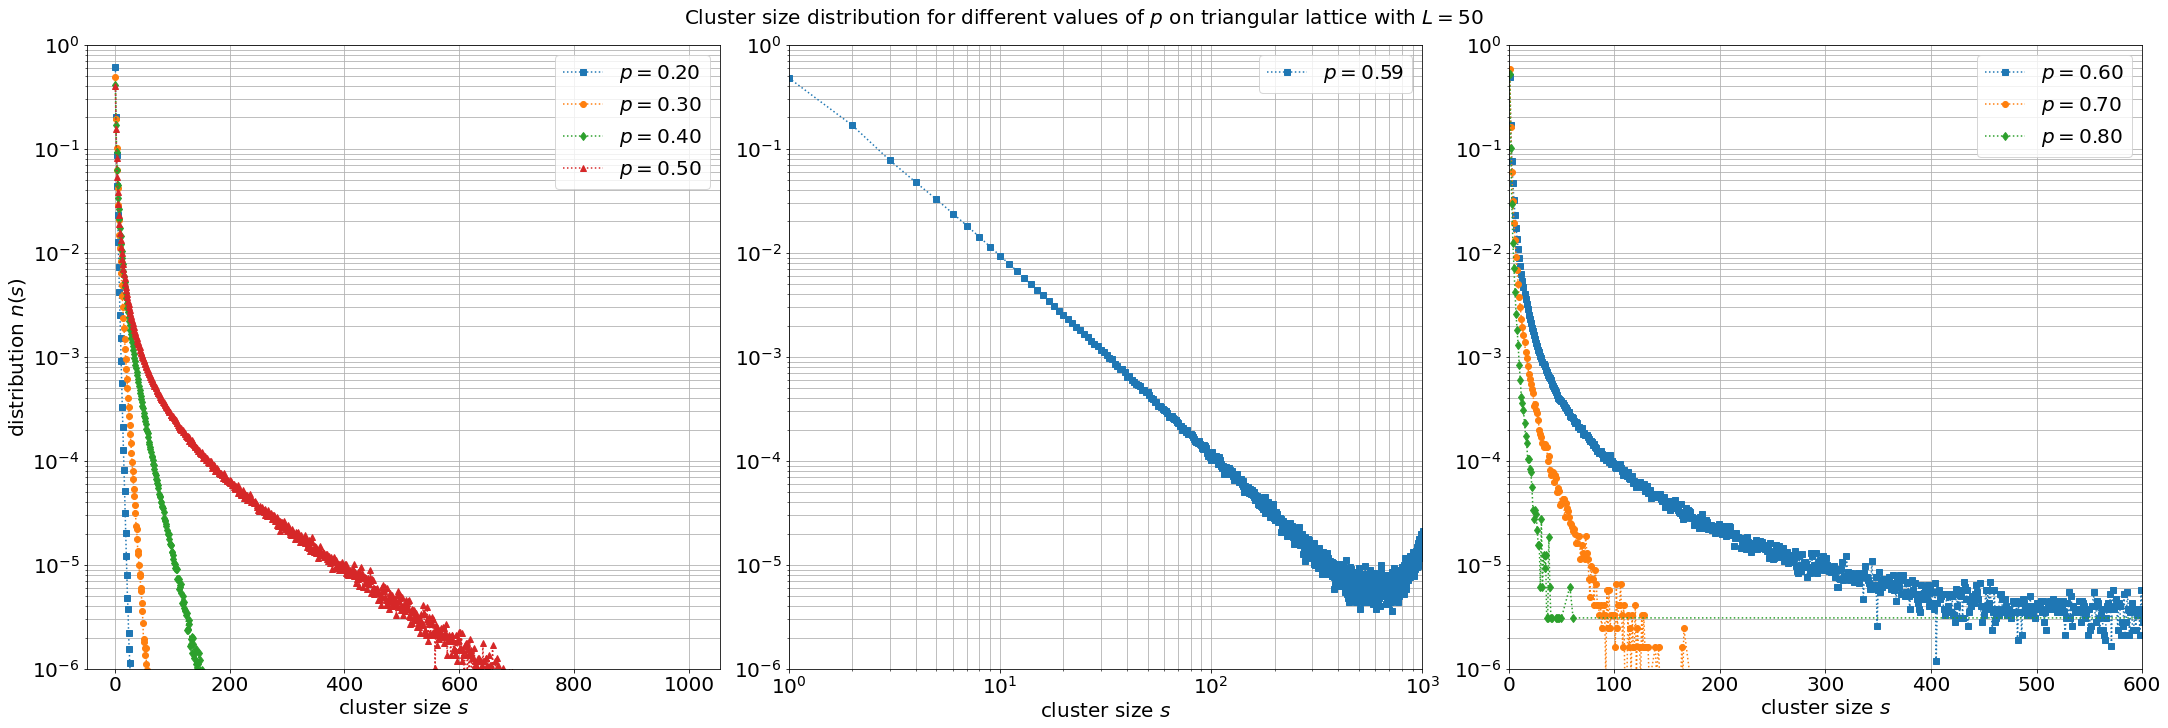

In [27]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(30,10),constrained_layout=True)
gs = GridSpec(1, 3, figure=fig)

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])

p1 = [0.2,0.3,0.4,0.5]
p2 = [0.59]
p3 = [0.6,0.7,0.8]
L = "50"

ax1.set_ylabel(r"distribution $n(s)$", fontsize=20)
markers = ["s","o","d","^"]
for p in p1:
    data = np.loadtxt(filename_triangle('triangle',L, "100000", p), delimiter=' ')
    s = data[:,0]
    n = data[:,1]
    ax1.semilogy(s, n/np.sum(n), label='$p = $' + r'{0:.2f}'.format(p), linestyle=':', marker=markers.pop(0))


markers = ["s","o","d","^"]
for p in p2:
    data = np.loadtxt(filename_triangle('triangle',L, "100000", p), delimiter=' ')
    s = data[:,0]
    n = data[:,1]
    ax2.loglog(s, n/np.sum(n), label='$p = $' + r'{0:.2f}'.format(p),linestyle=':', marker=markers.pop(0))
ax2.set_xlim([1,1000])

markers = ["s","o","d","^"]
for p in p3:
    data = np.loadtxt(filename_triangle('triangle',L, "100000", p), delimiter=' ')
    s = data[:,0]
    n = data[:,1]
    ax3.semilogy(s, n/np.sum(n), label='$p = $' + r'{0:.2f}'.format(p),linestyle=':', marker=markers.pop(0))
ax3.set_xlim([0,600])

for ax in [ax1,ax2,ax3]:
    ax.set_xlabel(r"cluster size $s$", fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.grid(visible=True, which='both')
    ax.legend(fontsize=20)
    ax.set_ylim([1e-6,1])


# set joint title
fig.suptitle("Cluster size distribution for different values of $p$ on triangular lattice with $L = "+L+"$", fontsize=20)
plt.show()